In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/credit-card-default.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

# Data Prepration and Model building

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X = df.iloc[:,:24]

y = df.iloc[:,24]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Applying Bagging/

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline


### Pipeline

In [9]:
pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=1)
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [10]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")

Training Accuracy: 1.0
Testing Accuracy: 0.7275555555555555


#### Bagging Classifier

In [11]:
from sklearn.ensemble import BaggingClassifier

In [12]:
bgclassifier = BaggingClassifier(
    estimator=pipeline,
    n_estimators=10,  # Number of base estimators
    random_state=1
)

In [13]:
bgclassifier.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                             StandardScaler()),
                                            ('decisiontreeclassifier',
                                             DecisionTreeClassifier(random_state=1))]),
                  random_state=1)

In [14]:
train_score = bgclassifier.score(X_train, y_train)
test_score = bgclassifier.score(X_test, y_test)

print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")

Training Accuracy: 0.9790952380952381
Testing Accuracy: 0.81


Tunning Bagging Classifier

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
    'estimator__decisiontreeclassifier__max_depth': range(1, 21, 5),  # Depths: 1, 6, 11, 16
    'max_samples': [0.05, 0.1, 0.2, 0.5],          # Sampling proportions
    'max_features': range(1, 21, 5)               # Features: 1, 6, 11, 16
}

GridSearch CV

In [17]:
gs = GridSearchCV(
    estimator=bgclassifier,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Evaluate using accuracy
    verbose=1,            # Show progress
    n_jobs=-1             # Use all available CPUs
)

In [18]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                                    StandardScaler()),
                                                                   ('decisiontreeclassifier',
                                                                    DecisionTreeClassifier(random_state=1))]),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'estimator__decisiontreeclassifier__max_depth': range(1, 21, 5),
                         'max_features': range(1, 21, 5),
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy', verbose=1)

In [19]:
print("Best Parameters:", gs.best_params_)

test_score = gs.score(X_test, y_test)
print(f"Test Accuracy (Tuned Model): {test_score}")

Best Parameters: {'estimator__decisiontreeclassifier__max_depth': 6, 'max_features': 16, 'max_samples': 0.5}
Test Accuracy (Tuned Model): 0.816


### Tunned model after Gridsearch CV

In [20]:
bgclassifier = BaggingClassifier(
    estimator=pipeline,                # Use the pipeline as the base estimator
    max_samples=gs.best_params_['max_samples'],  # Optimized max_samples
    max_features=gs.best_params_['max_features'],  # Optimized max_features
    random_state=1                     # Fix randomness for reproducibility
)

In [21]:
# Update the pipeline's DecisionTreeClassifier max_depth
pipeline.set_params(decisiontreeclassifier__max_depth=gs.best_params_['estimator__decisiontreeclassifier__max_depth'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=1))])

In [22]:
bgclassifier.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                             StandardScaler()),
                                            ('decisiontreeclassifier',
                                             DecisionTreeClassifier(max_depth=6,
                                                                    random_state=1))]),
                  max_features=16, max_samples=0.5, random_state=1)

In [23]:
# Evaluate the model on training data
train_score = bgclassifier.score(X_train, y_train)

# Evaluate the model on test data
test_score = bgclassifier.score(X_test, y_test)

print(f"Training Accuracy: {train_score}")
print(f"Testing Accuracy: {test_score}")

Training Accuracy: 0.82
Testing Accuracy: 0.816


### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier with default parameters and random_state=1
rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [25]:
# Make predictions on the test data
predictions = rfc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7058
           1       0.66      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [27]:
from sklearn.metrics import accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[6683  375]
 [1224  718]]
Accuracy: 0.8223333333333334


### Hyper-Parameter tunning

In [28]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_folds = 5

parameters = {
    'max_depth': range(2, 21, 5)  # Values: 2, 7, 12, 17
}

rf = RandomForestClassifier(random_state=1)

kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    scoring='accuracy',  # Use accuracy as the metric
    cv=kf,               # K-Fold cross-validation
    return_train_score=True,  # Include training scores
    verbose=1,           # Show progress
    n_jobs=-1            # Use all available CPUs
)

rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(2, 21, 5)}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [29]:
scores = rf_grid.cv_results_

# Convert the scores into a DataFrame
scores_df = pd.DataFrame(scores)

In [30]:
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.861764,0.947750,0.022949,0.002241,2,{'max_depth': 2},0.808810,0.801905,0.807619,0.788095,...,0.800810,0.007529,4,0.799940,0.800417,0.800298,0.804345,0.801488,0.801298,0.001609
1,4.168910,0.669128,0.060871,0.025064,7,{'max_depth': 7},0.821667,0.816667,0.821429,0.810714,...,0.816476,0.004596,3,0.831369,0.831131,0.829464,0.836071,0.832619,0.832131,0.002212
2,7.071187,0.873566,0.096890,0.027101,12,{'max_depth': 12},0.820952,0.818095,0.823095,0.809286,...,0.817381,0.004797,2,0.882738,0.886786,0.884345,0.886310,0.885893,0.885214,0.001484
3,8.327559,1.105967,0.100985,0.033774,17,{'max_depth': 17},0.822143,0.821190,0.822381,0.811905,...,0.818333,0.004444,1,0.928929,0.930119,0.927738,0.929405,0.931369,0.929512,0.001210


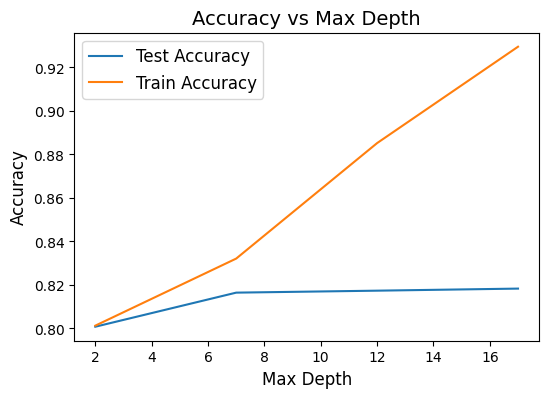

In [31]:
import matplotlib.pyplot as plt

# Extract the relevant data from the GridSearchCV results
max_depths = scores_df['param_max_depth'].astype(int)
mean_test_scores = scores_df['mean_test_score']
mean_train_scores = scores_df['mean_train_score']

# the accuracies
plt.figure(figsize=(6, 4))
plt.plot(max_depths, mean_test_scores, label='Test Accuracy')
plt.plot(max_depths, mean_train_scores, label='Train Accuracy')

plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Max Depth', fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.show()


### tuning n_estomators

In [32]:
parameters = {
    'n_estimators': range(100, 1501, 400)  # Values: 100, 500, 900, 1300
}

rf = RandomForestClassifier(max_depth=4, random_state=1)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    scoring='accuracy',       # Use accuracy as the scoring metric
    cv=5,                     # 5-fold cross-validation
    return_train_score=True,  # Include training scores
    verbose=1,                # Display progress
    n_jobs=-1                 # Use all available CPUs
)

rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1501, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [33]:
scores = rf_grid.cv_results_

# Convert the scores into a DataFrame
scores_df = pd.DataFrame(scores)

scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.526044,0.164125,0.030984,0.001616,100,{'n_estimators': 100},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,1,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,14.273276,0.293175,0.150870,0.031297,500,{'n_estimators': 500},0.812619,0.813571,0.810952,0.805476,...,0.810190,0.002952,2,0.811488,0.810417,0.812024,0.812560,0.812857,0.811869,0.000864
2,26.218951,0.239644,0.280894,0.090360,900,{'n_estimators': 900},0.811667,0.813810,0.811429,0.805238,...,0.810048,0.003021,3,0.811190,0.810536,0.811845,0.812798,0.812679,0.811810,0.000865
3,35.467593,3.333412,0.321125,0.053114,1300,{'n_estimators': 1300},0.811667,0.813571,0.811429,0.805000,...,0.809857,0.003103,4,0.811190,0.810238,0.811905,0.812798,0.812738,0.811774,0.000969


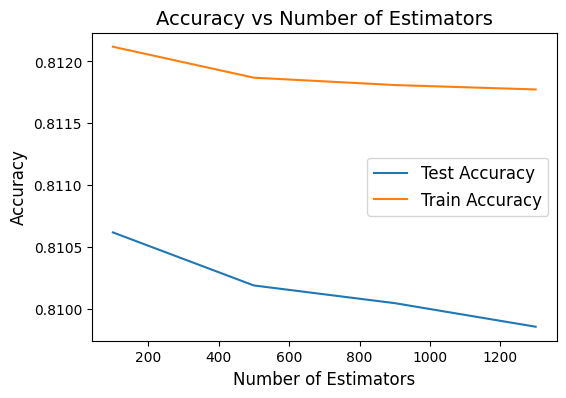

In [34]:
n_estimators = scores_df['param_n_estimators'].astype(int)  # n_estimators to integers
mean_test_scores = scores_df['mean_test_score']
mean_train_scores = scores_df['mean_train_score']

#  the accuracies
plt.figure(figsize=(6, 4))
plt.plot(n_estimators, mean_test_scores, label='Test Accuracy')
plt.plot(n_estimators, mean_train_scores, label='Train Accuracy')

plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Number of Estimators', fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.show()

## Tuning Max features

In [35]:
parameters = {
    'max_features': [4, 8, 14, 20, 24]
}

rf = RandomForestClassifier(max_depth=4, random_state=1)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    scoring='accuracy',       # Use accuracy as the scoring metric
    cv=5,                     # 5-fold cross-validation
    return_train_score=True,  # Include training scores
    verbose=1,                # Display progress
    n_jobs=-1                 # Use all available CPUs
)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [36]:
scores = rf_grid.cv_results_

scores_df = pd.DataFrame(scores)

scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.941276,0.697930,0.035693,0.010826,4,{'max_features': 4},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,5,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,4.593874,0.618079,0.034570,0.011503,8,{'max_features': 8},0.817619,0.820952,0.820000,0.817381,...,0.818905,0.001377,1,0.821369,0.820179,0.821726,0.821369,0.821131,0.821155,0.000524
2,8.479385,0.836458,0.028732,0.000083,14,{'max_features': 14},0.817619,0.821429,0.817857,0.816429,...,0.818571,0.001737,4,0.822321,0.820952,0.821726,0.822321,0.821310,0.821726,0.000544
3,11.432700,0.780972,0.033029,0.007060,20,{'max_features': 20},0.817619,0.821905,0.819762,0.815476,...,0.818619,0.002148,3,0.822262,0.820774,0.821369,0.822798,0.821964,0.821833,0.000703
4,13.291992,0.766738,0.033584,0.012971,24,{'max_features': 24},0.818095,0.821667,0.819762,0.815000,...,0.818667,0.002190,2,0.822976,0.821250,0.821726,0.823214,0.822976,0.822429,0.000787


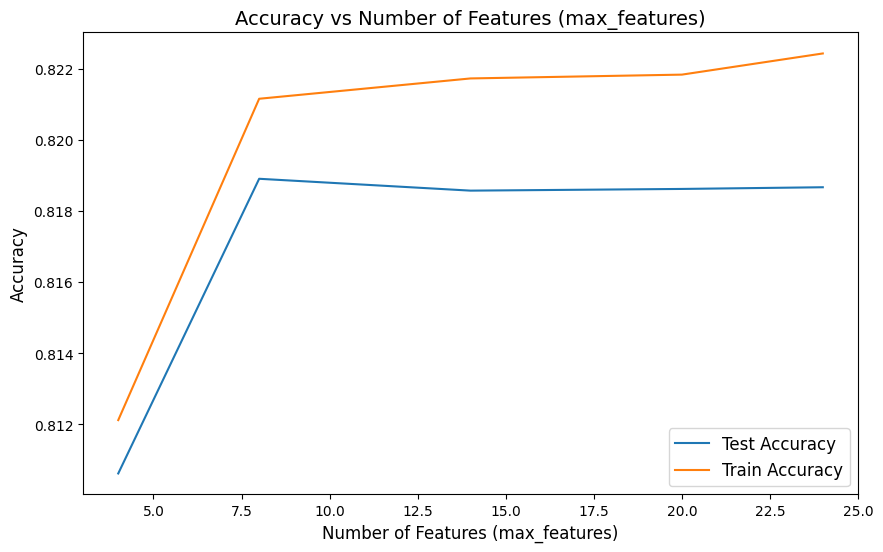

In [37]:
max_features = scores_df['param_max_features'].astype(int)  # Convert max_features to integers
mean_test_scores = scores_df['mean_test_score']
mean_train_scores = scores_df['mean_train_score']

plt.figure(figsize=(10, 6))
plt.plot(max_features, mean_test_scores, label='Test Accuracy')
plt.plot(max_features, mean_train_scores, label='Train Accuracy')

plt.xlabel('Number of Features (max_features)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Number of Features (max_features)', fontsize=14)
plt.legend(fontsize=12)

plt.show()

# Tuning Min-Sample leaf

In [38]:
parameters = {
    'min_samples_leaf': range(100, 401, 50)
}

rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    scoring='accuracy',       # Use accuracy as the scoring metric
    cv=5,                     # 5-fold cross-validation
    return_train_score=True,  # Include training scores
    verbose=1,                # Display progress
    n_jobs=-1                 # Use all available CPUs
)

rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'min_samples_leaf': range(100, 401, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [39]:
scores = rf_grid.cv_results_

scores_df = pd.DataFrame(scores)

scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.380068,1.053064,0.060076,0.008613,100,{'min_samples_leaf': 100},0.815238,0.817857,0.815238,0.811667,...,0.814286,0.002433,1,0.817679,0.816012,0.816964,0.817619,0.818333,0.817321,0.000785
1,5.037825,1.172088,0.051346,0.003261,150,{'min_samples_leaf': 150},0.812381,0.814524,0.812381,0.808095,...,0.811095,0.002571,2,0.810952,0.812262,0.812500,0.814702,0.812560,0.812595,0.001205
2,4.682858,1.046938,0.057192,0.019186,200,{'min_samples_leaf': 200},0.810952,0.811429,0.811190,0.805476,...,0.809429,0.002316,3,0.808810,0.809821,0.809583,0.811131,0.811845,0.810238,0.001098
3,3.896668,0.466233,0.055797,0.017457,250,{'min_samples_leaf': 250},0.810952,0.811429,0.809762,0.803571,...,0.808524,0.002933,4,0.808631,0.808155,0.810298,0.810298,0.810714,0.809619,0.001024
4,3.916311,0.712357,0.043661,0.001234,300,{'min_samples_leaf': 300},0.809286,0.809524,0.808810,0.804762,...,0.807476,0.002133,5,0.807798,0.806429,0.808750,0.808988,0.808869,0.808167,0.000966


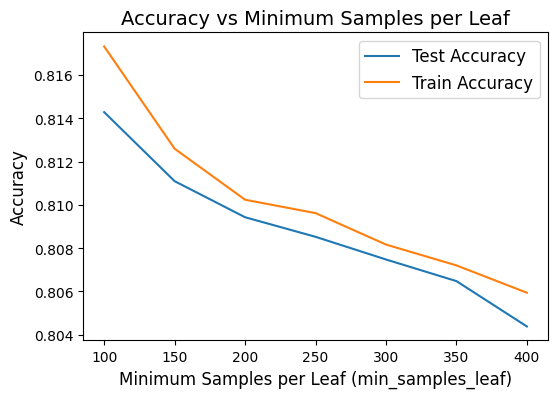

In [40]:
min_samples_leaf = scores_df['param_min_samples_leaf'].astype(int)  # Convert min_samples_leaf to integers
mean_test_scores = scores_df['mean_test_score']
mean_train_scores = scores_df['mean_train_score']

plt.figure(figsize=(6, 4))
plt.plot(min_samples_leaf, mean_test_scores, label='Test Accuracy')
plt.plot(min_samples_leaf, mean_train_scores, label='Train Accuracy')

plt.xlabel('Minimum Samples per Leaf (min_samples_leaf)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Minimum Samples per Leaf', fontsize=14)
plt.legend(fontsize=12)

plt.show()

# Tuning min_samples split

In [41]:
parameters = {
    'min_samples_split': range(200, 501, 50)  # Values: 200, 250, 300, 350, 400, 450, 500
}

rf = RandomForestClassifier(random_state=1)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'min_samples_split': range(200, 501, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [42]:
scores = rf_grid.cv_results_

# Convert the scores into a DataFrame
scores_df = pd.DataFrame(scores)

scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.107562,0.921879,0.064399,0.002147,200,{'min_samples_split': 200},0.818571,0.820714,0.820714,0.817381,...,0.819190,0.001318,1,0.824286,0.823333,0.823274,0.824048,0.823988,0.823786,0.000407
1,6.992296,1.203107,0.058373,0.000395,250,{'min_samples_split': 250},0.818810,0.821667,0.820000,0.816905,...,0.819143,0.001605,2,0.822321,0.821607,0.822976,0.822976,0.823274,0.822631,0.000599
2,7.229607,1.162678,0.056719,0.000808,300,{'min_samples_split': 300},0.817381,0.821667,0.822143,0.816667,...,0.818714,0.002662,3,0.821667,0.821131,0.821726,0.821964,0.822679,0.821833,0.000503
3,6.560430,0.915514,0.067885,0.019350,350,{'min_samples_split': 350},0.817857,0.821429,0.820714,0.815714,...,0.818190,0.002522,6,0.820119,0.820833,0.820655,0.822440,0.821726,0.821155,0.000825
4,6.301861,0.794979,0.057335,0.005925,400,{'min_samples_split': 400},0.816905,0.820476,0.820952,0.815952,...,0.818381,0.001983,4,0.819762,0.819881,0.820298,0.820476,0.821071,0.820298,0.000467


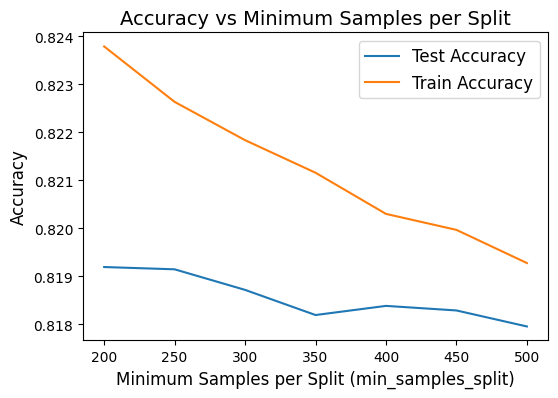

In [43]:
min_samples_split = scores_df['param_min_samples_split'].astype(int)
mean_test_scores = scores_df['mean_test_score']
mean_train_scores = scores_df['mean_train_score']

plt.figure(figsize=(6, 4))
plt.plot(min_samples_split, mean_test_scores, label='Test Accuracy')
plt.plot(min_samples_split, mean_train_scores, label='Train Accuracy')

plt.xlabel('Minimum Samples per Split (min_samples_split)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs Minimum Samples per Split', fontsize=14)
plt.legend(fontsize=12)

plt.show()

### Random search to find optimal hyperparameters

In [44]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [4, 8, 10],
    'min_samples_leaf': range(100, 400, 200),    # Values: 100, 300
    'min_samples_split': range(200, 500, 200),  # Values: 200, 400
    'n_estimators': [100, 200, 300],            # Values: 100, 200, 300
    'max_features': [5, 10]                    # Values: 5, 10
}

rf = RandomForestClassifier(random_state=1)

rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,                      # Number of combinations to sample
    scoring='accuracy',             # Use accuracy as the scoring metric
    cv=5,                           # 5-fold cross-validation
    verbose=1,                      # Display progress
    random_state=1,                 # Ensure reproducibility
    n_jobs=-1                       # Use all available CPUs for parallel processing
)



In [45]:
rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='accuracy', verbose=1)

In [47]:
print("Optimal Hyperparameters:", rs.best_params_)

# Print the optimal cross-validation accuracy score
print(f"Optimal Cross-Validation Accuracy: {rs.best_score_}")

Optimal Hyperparameters: {'n_estimators': 300, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 4}
Optimal Cross-Validation Accuracy: 0.8180476190476191


Fitting the final model with the best parameters obtained from Random search.

In [49]:
rfc = RandomForestClassifier(
    n_estimators=rs.best_params_['n_estimators'],
    max_depth=rs.best_params_['max_depth'],
    min_samples_split=rs.best_params_['min_samples_split'],
    min_samples_leaf=rs.best_params_['min_samples_leaf'],
    max_features=rs.best_params_['max_features'],
    random_state=1
)

In [50]:
# Fit the Random Forest model on the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=100,
                       min_samples_split=400, n_estimators=300, random_state=1)

In [51]:
# Generate predictions on the test data
predictions = rfc.predict(X_test)


In [52]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predictions)

# Print the report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Compute and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.3f}")


Confusion Matrix:
[[6751  307]
 [1254  688]]
Accuracy: 0.827


# Extra Tree Algorithm

In [55]:
# Import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate ExtraTreesClassifier with default parameters and random_state=1
et = ExtraTreesClassifier(random_state=1)

# Fit the model on the training data
et.fit(X_train, y_train)


ExtraTreesClassifier(random_state=1)

In [56]:
# Generate predictions on the test data
predictions = et.predict(X_test)


In [57]:
# Generate and print the classification report
report = classification_report(y_test, predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.62      0.36      0.45      1942

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [58]:
conf_matrix = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6629  429]
 [1248  694]]


In [59]:
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


### Hyperparameter tuning of extra Tree classifier

In [60]:
param_grid = {
    'max_depth': [4, 8, 10],  # Maximum depth of the tree
    'min_samples_leaf': range(100, 400, 200),  # Values: 100, 300
    'min_samples_split': range(200, 500, 200),  # Values: 200, 400
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': [5, 10]  # Number of features to consider when splitting a node
}

# Instantiate RandomizedSearchCV with ExtraTreesClassifier, parameter grid, random_state=1, n_iter=10, cv=5, and accuracy scoring
rs = RandomizedSearchCV(estimator=et, param_distributions=param_grid, n_iter=10, random_state=1, cv=5, scoring='accuracy', return_train_score=True)

# Fit the RandomizedSearchCV to the training data
rs.fit(X_train, y_train)

# Print the best accuracy score and hyperparameters found
print("Best Accuracy Score: {:.4f}".format(rs.best_score_))
print("Best Hyperparameters:", rs.best_params_)

Best Accuracy Score: 0.8113
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


In [61]:
# Instantiate ExtraTreesClassifier with the best hyperparameters found
et = ExtraTreesClassifier(
    n_estimators=rs.best_params_['n_estimators'],
    max_depth=rs.best_params_['max_depth'],
    min_samples_leaf=rs.best_params_['min_samples_leaf'],
    min_samples_split=rs.best_params_['min_samples_split'],
    max_features=rs.best_params_['max_features'],
    random_state=1
)

# Fit the model on the training data
et.fit(X_train, y_train)


ExtraTreesClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                     min_samples_split=400, random_state=1)

In [62]:
# Make predictions on the test data
predictions = et.predict(X_test)


In [63]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print(f"Accuracy: {accuracy}")

Accuracy: 0.8191111111111111


## The Random Forest Classifier is the best performing model